# Telecom customers churn data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing/ REading the dataset

In [2]:
data=pd.read_csv('Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
data['TotalCharges']=data['TotalCharges'].str.split(' ').str[0]

In [6]:
data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], downcast="float")   #converting from object to float
data["TotalCharges"].fillna(0.0,inplace=True)  

In [14]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

Data type of total charges successfully converted

In [15]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float32: ['TotalCharges'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [16]:
data_int=data[['SeniorCitizen', 'tenure','TotalCharges','MonthlyCharges']].copy()

In [27]:

data_cat=data[[ 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']].copy()


In [18]:
data_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [19]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null value , so we can proceed further for EDA.

In [23]:
data.drop(['customerID'],axis=1,inplace=True)

# Data Analysis / EDA 

In [21]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.732178
std,0.368612,24.559481,30.090047,2266.794434
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.549988
50%,0.000000,29.000000,70.350000,1394.550049
75%,0.000000,55.000000,89.850000,3786.599976
max,1.000000,72.000000,118.750000,8684.799805


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

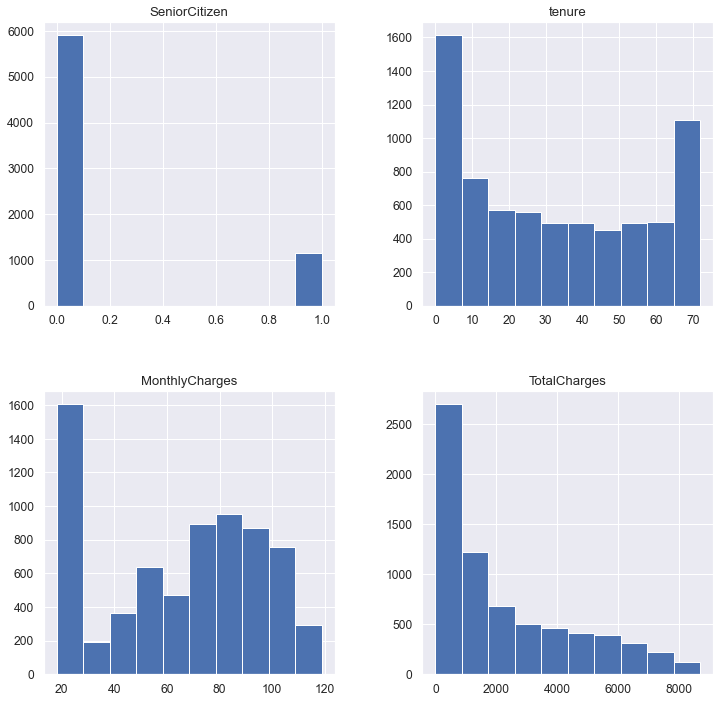

In [22]:
sns.set(style="darkgrid", palette='deep', font_scale=1.1)
data.hist(figsize=(12,12))

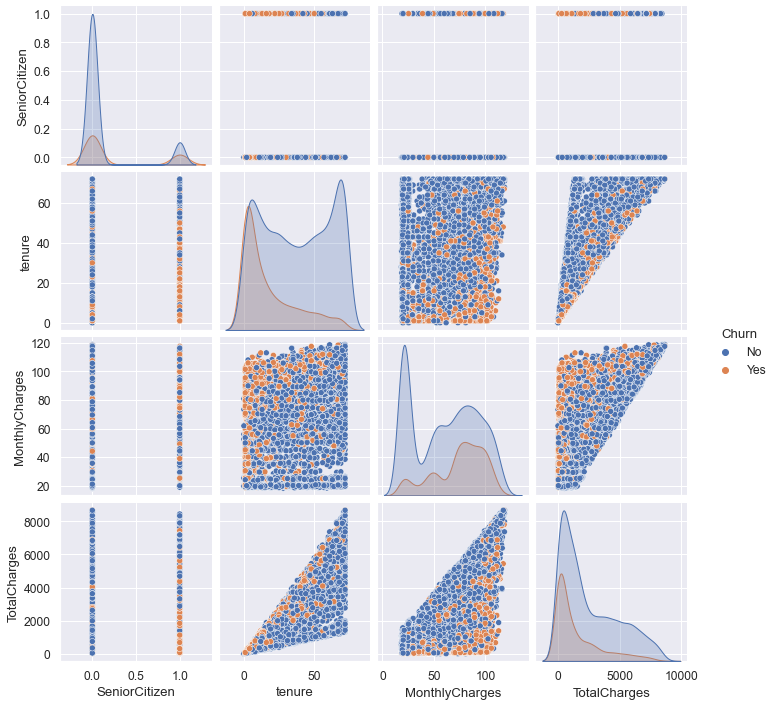

In [30]:
sns.pairplot(data,hue='Churn')

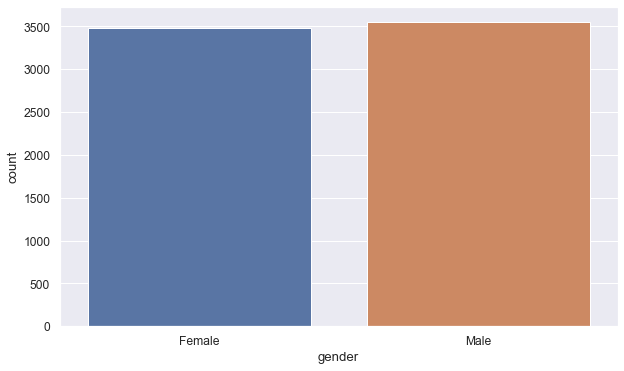

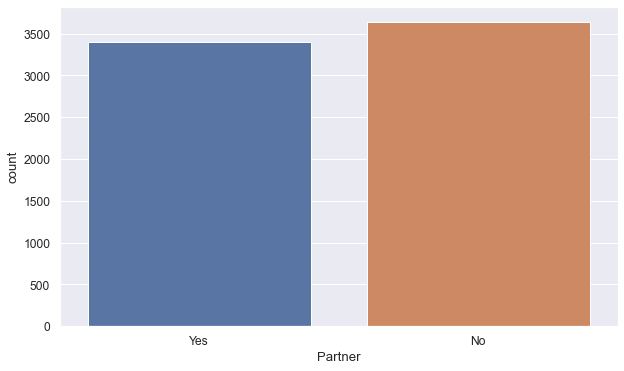

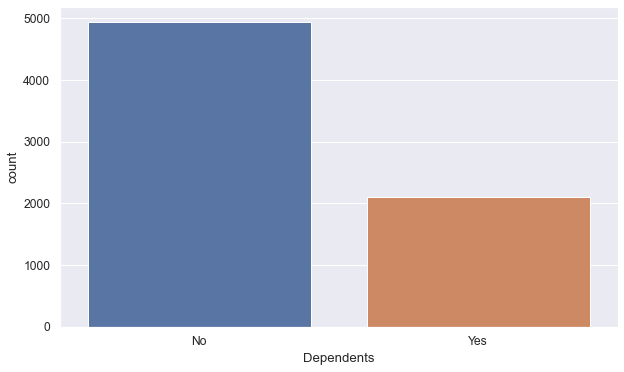

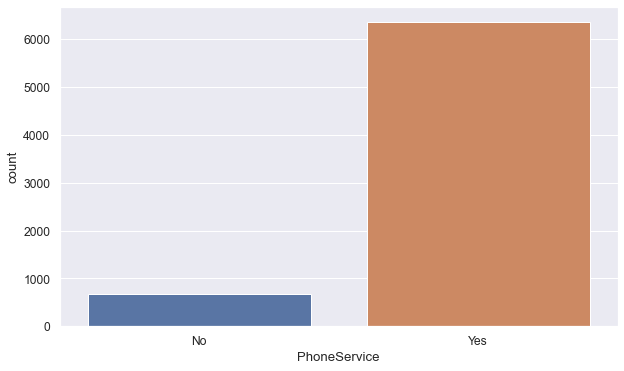

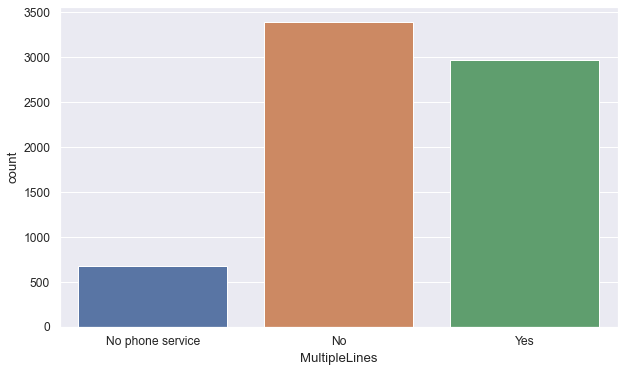

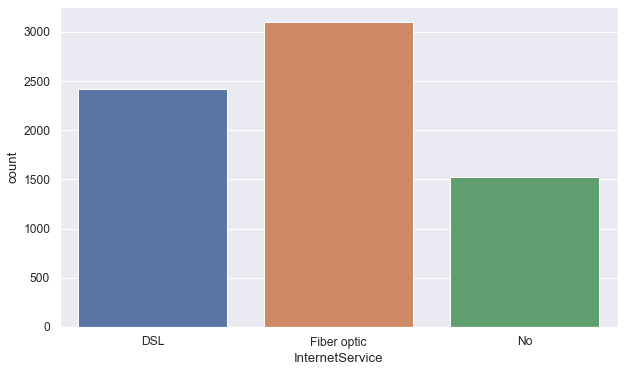

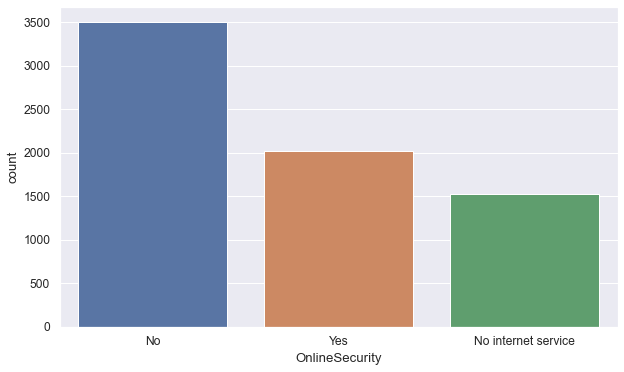

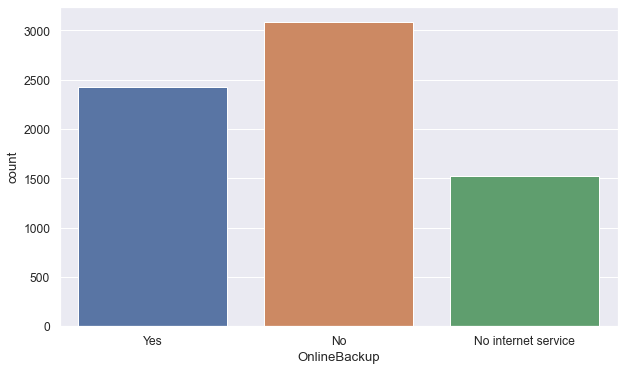

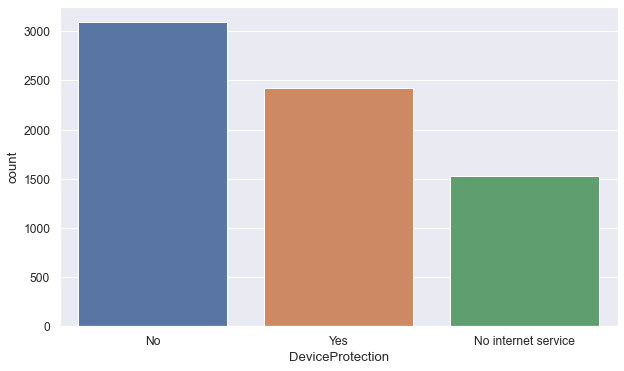

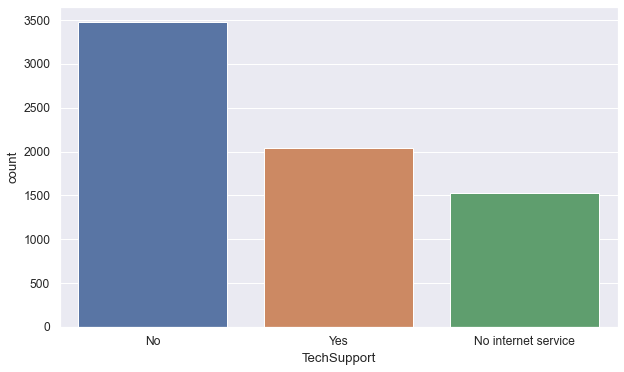

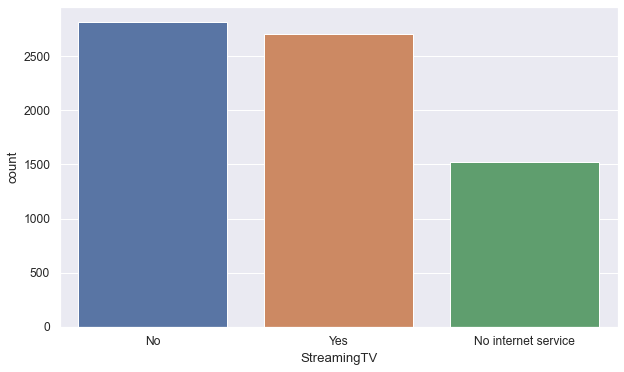

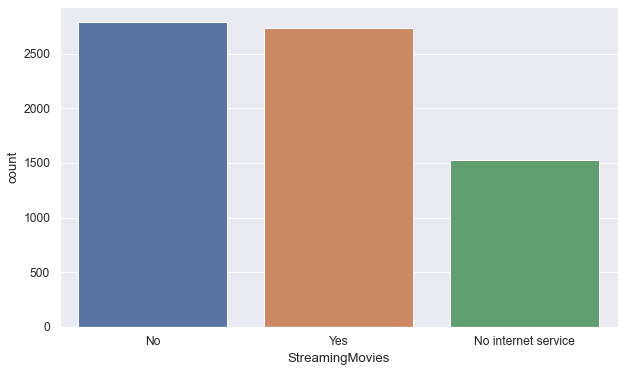

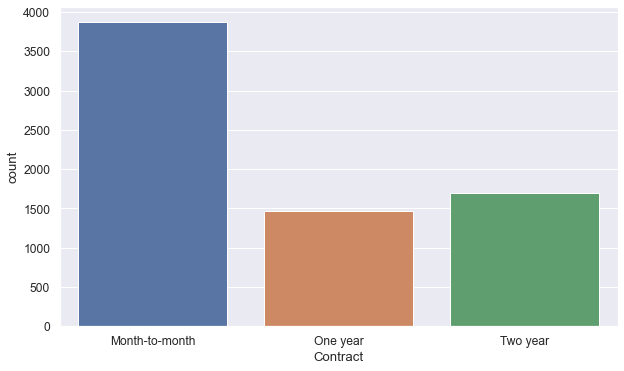

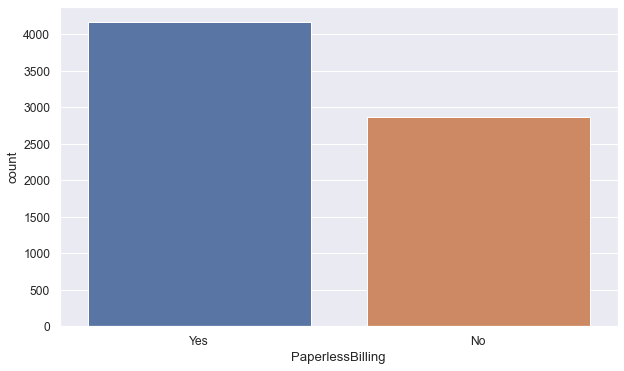

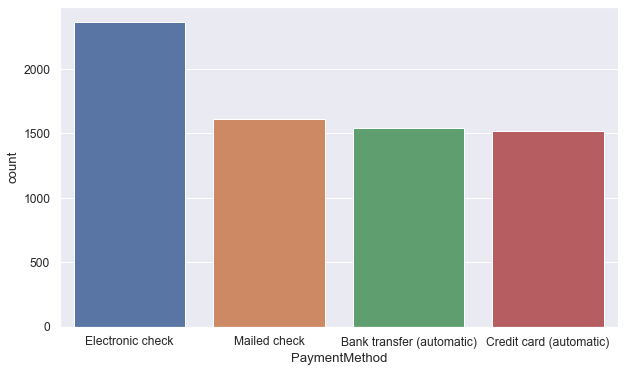

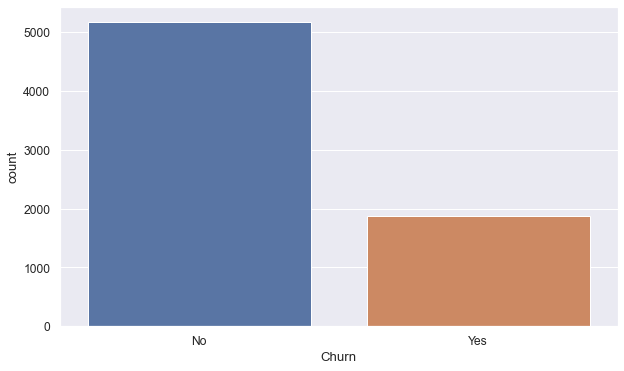

In [29]:
for i in data_cat:
        plt.figure(figsize=(10,20))
        plt.subplot(311)
        sns.countplot(data[i])

<AxesSubplot:xlabel='Churn', ylabel='count'>

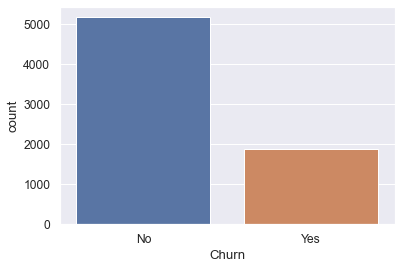

In [31]:
sns.countplot(data['Churn'])

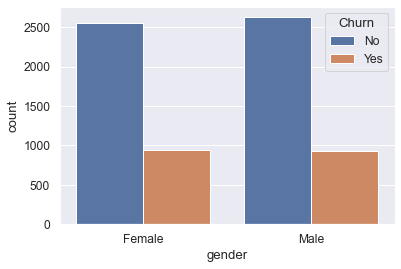

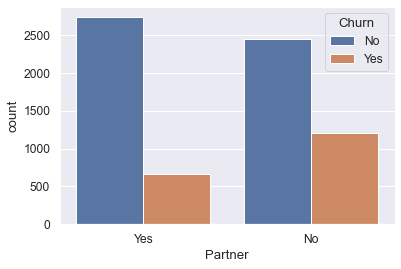

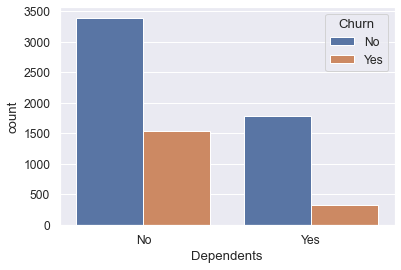

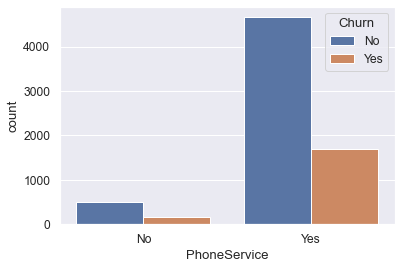

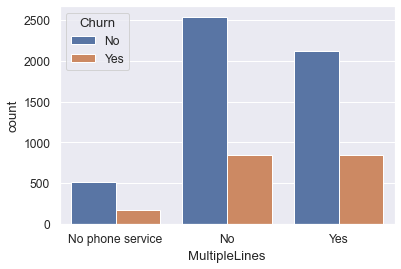

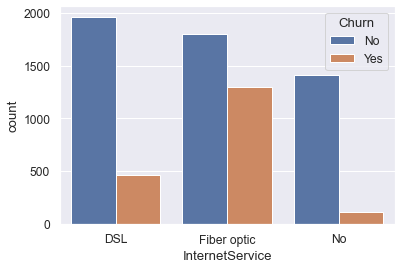

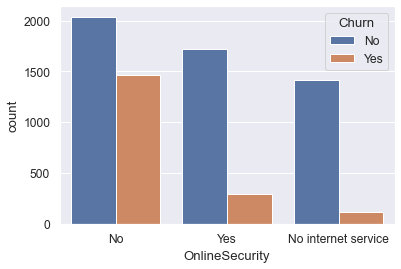

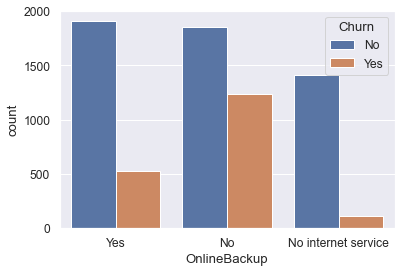

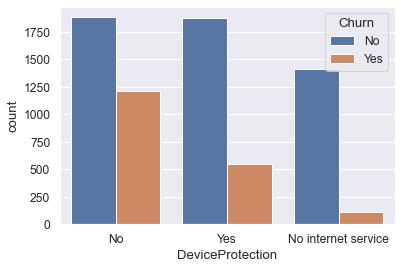

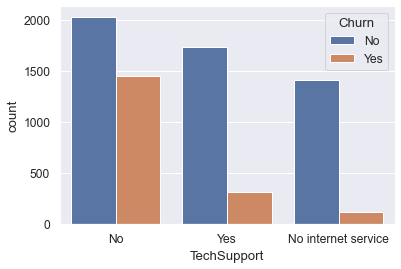

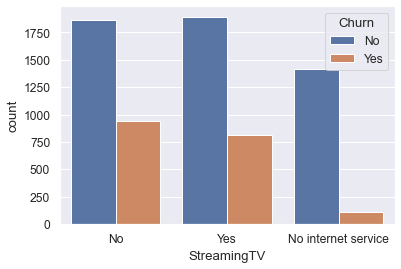

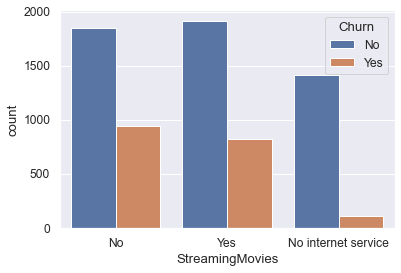

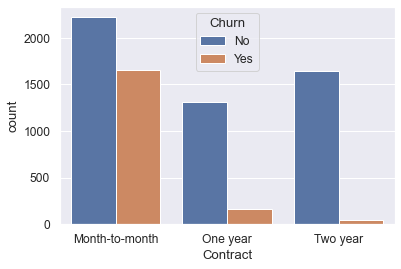

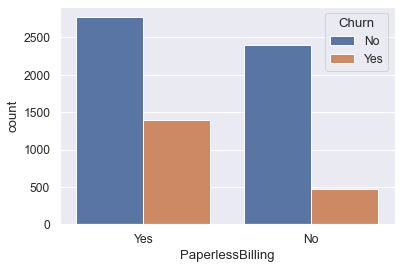

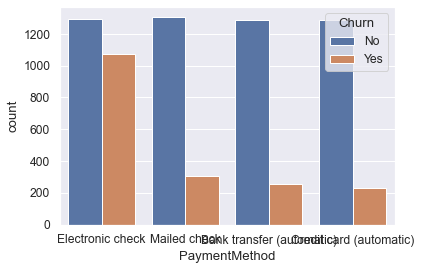

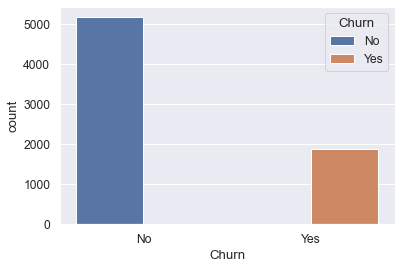

In [32]:
for i in data_cat:
    plt.figure(i)
    sns.countplot(data=data_cat,x = i, hue = 'Churn' )

observations:
    Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churners

## Label encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
for cat in data_cat:
    data_cat[cat]=le.fit_transform(data_cat[cat])

In [35]:
for i in data_cat:
    print(i)
    print(data_cat[i].unique(),'\n')
    print(data_cat[i].value_counts(),'\n')

gender
[0 1] 

1    3555
0    3488
Name: gender, dtype: int64 

Partner
[1 0] 

0    3641
1    3402
Name: Partner, dtype: int64 

Dependents
[0 1] 

0    4933
1    2110
Name: Dependents, dtype: int64 

PhoneService
[0 1] 

1    6361
0     682
Name: PhoneService, dtype: int64 

MultipleLines
[1 0 2] 

0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64 

InternetService
[0 1 2] 

1    3096
0    2421
2    1526
Name: InternetService, dtype: int64 

OnlineSecurity
[0 2 1] 

0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup
[2 0 1] 

0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection
[0 2 1] 

0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64 

TechSupport
[0 2 1] 

0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64 

StreamingTV
[0 2 1] 

0    2810
2    2707
1    1526
Name: StreamingTV, dtype: int64 

StreamingMovies
[0 2 1] 

0    2785
2    2732
1    1526
Name: StreamingMovies, dtype: int6

In [40]:
df=pd.concat([data_int,data_cat],axis=1)
df.head()

,SeniorCitizen,tenure,TotalCharges,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.850000,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,1889.500000,56.95,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,108.150002,53.85,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,1840.750000,42.30,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,151.649994,70.70,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   TotalCharges      7043 non-null   float32
 3   MonthlyCharges    7043 non-null   float64
 4   gender            7043 non-null   int32  
 5   Partner           7043 non-null   int32  
 6   Dependents        7043 non-null   int32  
 7   PhoneService      7043 non-null   int32  
 8   MultipleLines     7043 non-null   int32  
 9   InternetService   7043 non-null   int32  
 10  OnlineSecurity    7043 non-null   int32  
 11  OnlineBackup      7043 non-null   int32  
 12  DeviceProtection  7043 non-null   int32  
 13  TechSupport       7043 non-null   int32  
 14  StreamingTV       7043 non-null   int32  
 15  StreamingMovies   7043 non-null   int32  
 16  Contract          7043 non-null   int32  


In [42]:
#Correlation 

df_corr= df.corr()
df_corr

,SeniorCitizen,tenure,TotalCharges,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
SeniorCitizen,1.000000,0.016567,0.103006,0.220173,-0.001874,0.016479,-0.211185,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.150889
tenure,0.016567,1.000000,0.826178,0.247900,0.005106,0.379697,0.159712,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,-0.352229
TotalCharges,0.103006,0.826178,1.000000,0.651174,-0.000080,0.317504,0.062078,0.113214,0.452577,-0.175755,0.253224,0.374410,0.387897,0.275625,0.391470,0.398066,0.446855,0.158574,-0.330918,-0.198324
MonthlyCharges,0.220173,0.247900,0.651174,1.000000,-0.014569,0.096848,-0.113890,0.247398,0.433576,-0.323260,-0.053878,0.119777,0.163652,-0.008682,0.336706,0.335459,-0.074195,0.352150,-0.193407,0.193356
gender,-0.001874,0.005106,-0.000080,-0.014569,1.000000,-0.001808,0.010517,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.008612
Partner,0.016479,0.379697,0.317504,0.096848,-0.001808,1.000000,0.452676,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,-0.150448
Dependents,-0.211185,0.159712,0.062078,-0.113890,0.010517,0.452676,1.000000,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.164221
PhoneService,0.008576,0.008448,0.113214,0.247398,-0.006488,0.017706,-0.001762,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.011942
MultipleLines,0.146185,0.343032,0.452577,0.433576,-0.006739,0.142410,-0.024991,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.038037
InternetService,-0.032310,-0.030359,-0.175755,-0.323260,-0.000863,0.000891,0.044590,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.047291


<AxesSubplot:>

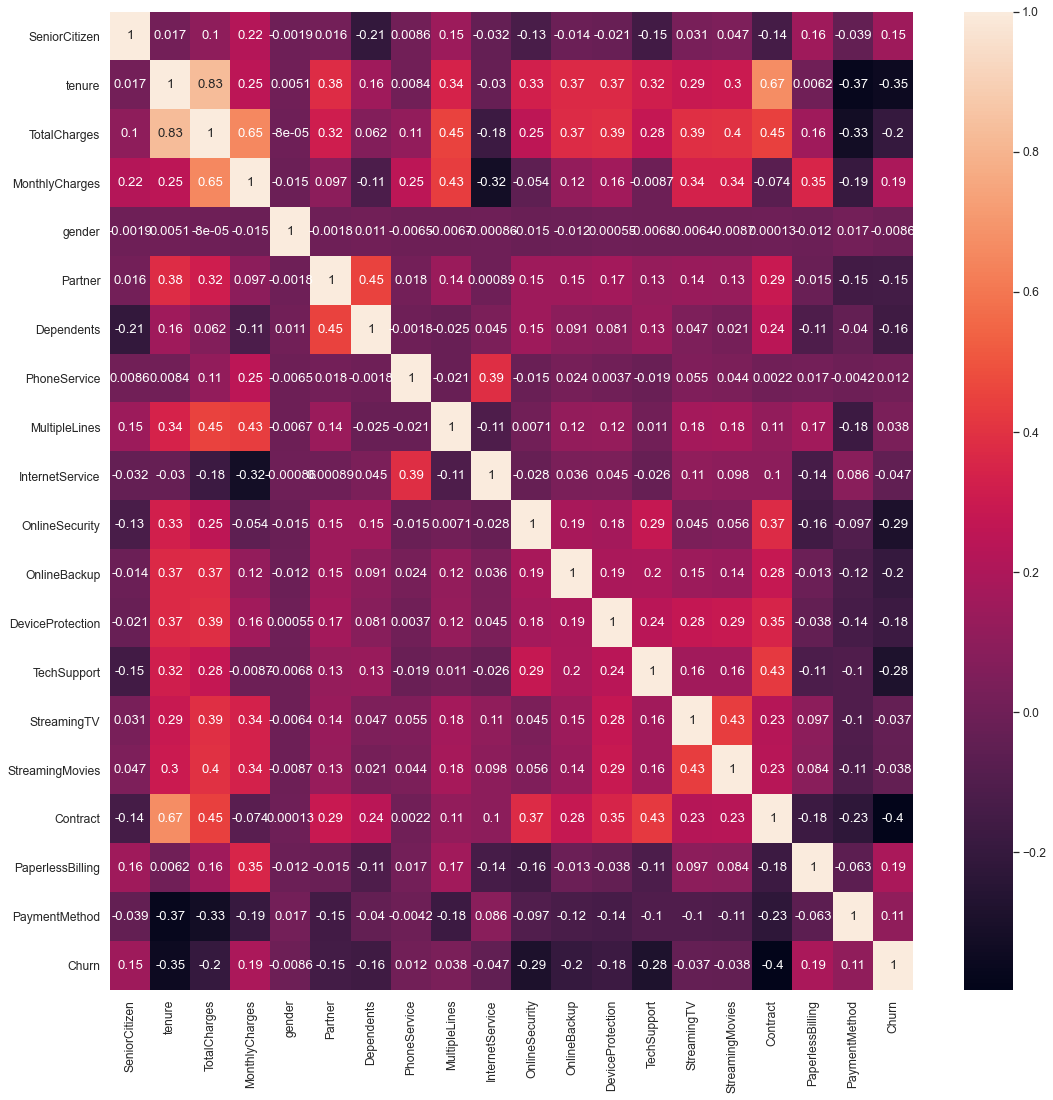

In [43]:
plt.figure(figsize=(18,18))
sns.heatmap(df_corr, annot= True)

Total charges and monthly charges both are correlated so we can drop one , we'll drop monthly charges column .

In [44]:
df.drop(['MonthlyCharges'], axis= 1, inplace= True)

## Outliers

In [53]:
from scipy.stats import zscore
zscore = abs(zscore(df))
df_ = df.loc[(zscore<3).all(axis = 1)]
print(df.shape)
print("After removing outliers",df_.shape)

(7043, 19)
After removing outliers (6352, 19)


## Splitting and scaling of data

In [54]:
x=df_.iloc[:,:-1]
x.head()

,SeniorCitizen,tenure,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1,0.0,34,7.544597,1,0,0.000000,1,0,0,2,0,2,0,0,0,0.693147,0,3
2,0.0,2,4.692723,1,0,0.000000,1,0,0,2,2,0,0,0,0,0.000000,1,3
4,0.0,2,5.028148,0,0,0.000000,1,0,1,0,0,0,0,0,0,0.000000,1,2
5,0.0,8,6.711132,0,0,0.000000,1,2,1,0,0,2,0,2,2,0.000000,1,2
6,0.0,22,7.575790,1,0,0.693147,1,2,1,0,2,0,0,2,0,0.000000,1,1


In [58]:
y=df_['Churn']
y.head()

1    0
2    1
4    1
5    1
6    0
Name: Churn, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_['Churn']=le.fit_transform(df_['Churn'])

In [59]:
#Applying the standard scaling on the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.44196502,  0.06163306,  0.36477065, ...,  0.60191949,
        -1.21309329,  1.33767743],
       [-0.44196502, -1.24022514, -1.47880502, ..., -0.86503493,
         0.82433891,  1.33767743],
       [-0.44196502, -1.24022514, -1.26197201, ..., -0.86503493,
         0.82433891,  0.40137693],
       ...,
       [-0.44196502,  1.60758966,  1.24377115, ...,  0.60191949,
         0.82433891, -0.53492357],
       [ 2.26262248, -1.158859  , -0.80903953, ..., -0.86503493,
         0.82433891,  1.33767743],
       [-0.44196502,  1.36349125,  1.19658202, ...,  1.46003281,
         0.82433891, -1.47122407]])

In [60]:
y.value_counts()

0    4653
1    1699
Name: Churn, dtype: int64

In [61]:
#lets use oversampling technique on minority class using smote method
#import smote from imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()

0    4653
1    4653
Name: Churn, dtype: int64

In [62]:
#Splitting into train and test dataset

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=56)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7444, 18), (1862, 18), (7444,), (1862,))

# ML Alogrithms

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,mean_squared_error,mean_absolute_error

In [65]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=45)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=45)
GBC=GradientBoostingClassifier(random_state=45)
ABC=AdaBoostClassifier(random_state=45)
ETC=ExtraTreesClassifier(random_state=45)

In [66]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier()


Accuracy_score =  0.784640171858217


Cross_Val_Score =  0.7594416381914525


roc_auc_score =  0.7848687694474923


classification_report
               precision    recall  f1-score   support

           0       0.86      0.68      0.76       933
           1       0.73      0.89      0.81       929

    accuracy                           0.78      1862
   macro avg       0.80      0.78      0.78      1862
weighted avg       0.80      0.78      0.78      1862



[[633 300]
 [101 828]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC()


Accuracy_score =  0.8114930182599356


Cross_Val_Score =  0.7981736245233497


roc_auc_score =  0.8115740628572945


classification_report
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       933
           1       0.79      0.85      0.82       929

 

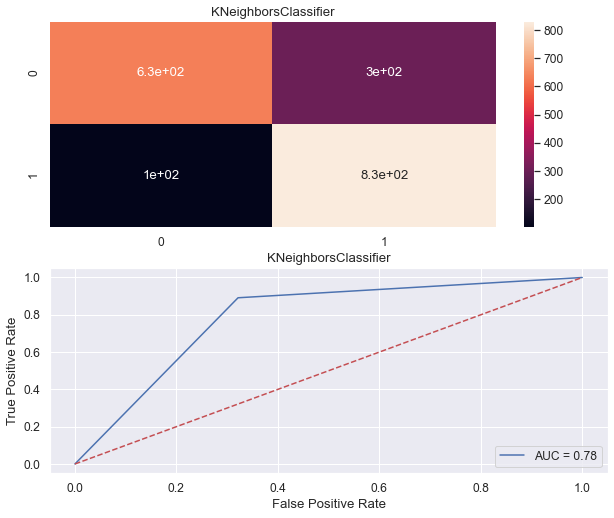

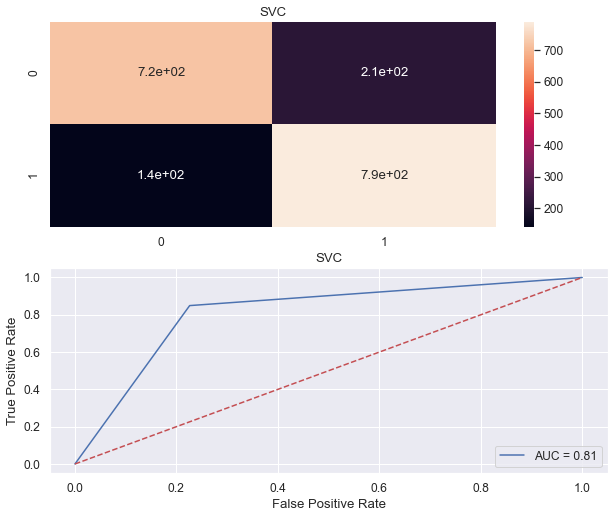

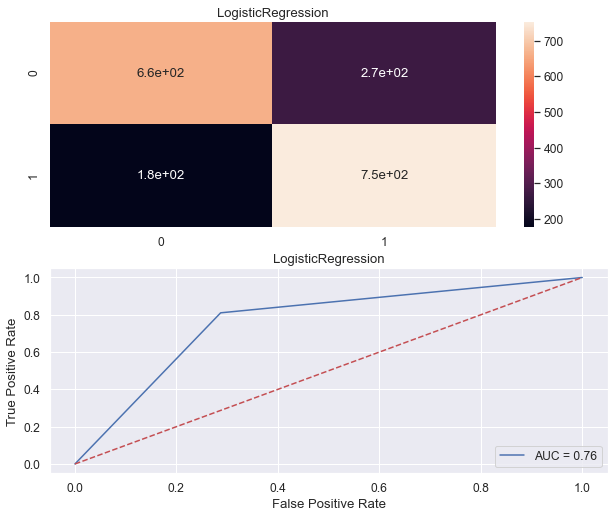

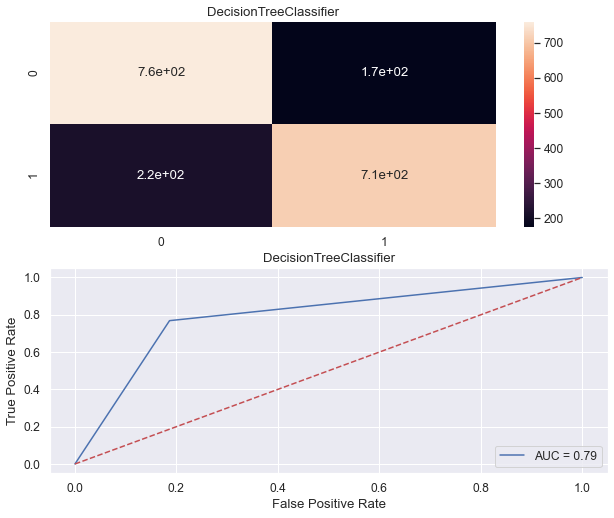

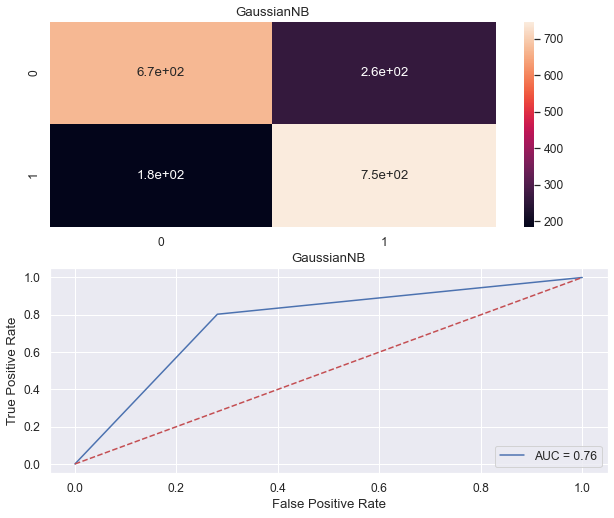

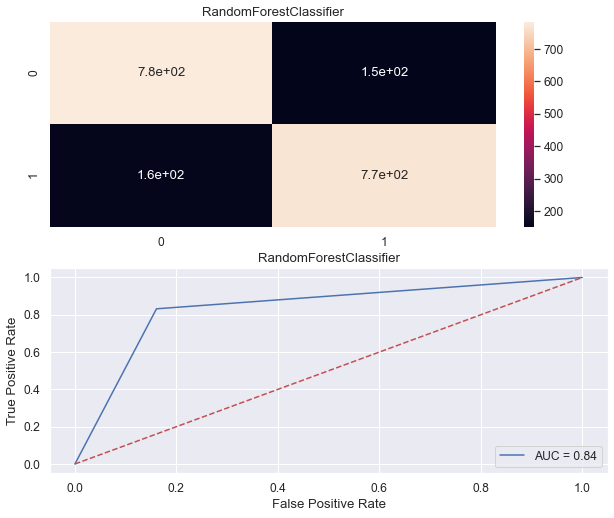

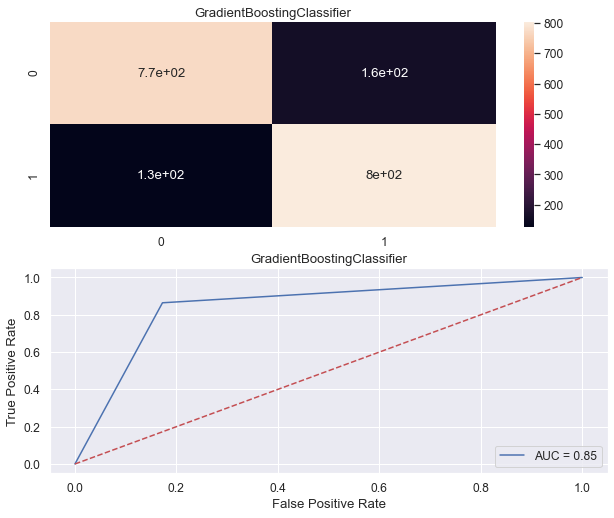

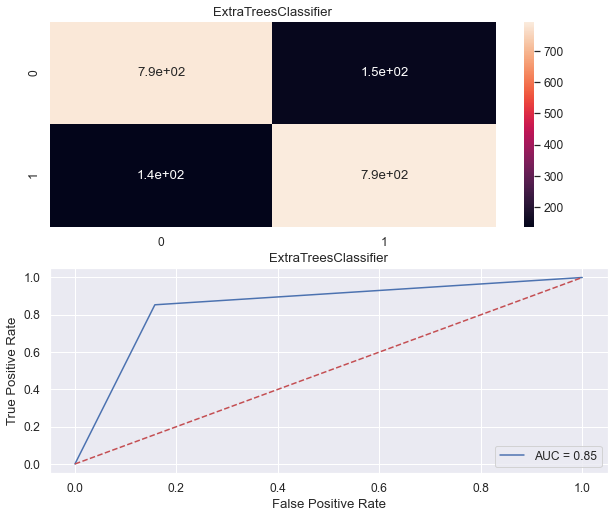

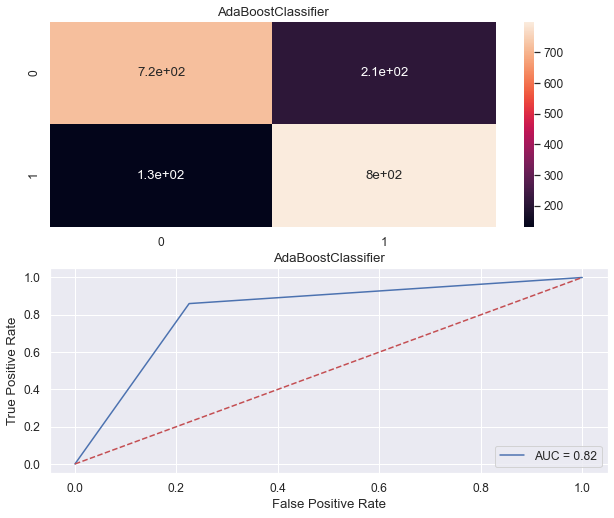

In [67]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [68]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.784640,0.759442,0.784869
1,SVC,0.811493,0.798174,0.811574
2,LogisticRegression,0.761547,0.790774,0.761652
3,DecisionTreeClassifier,0.791085,0.734892,0.791037
4,GaussianNB,0.761010,0.755353,0.761100
5,RandomForestClassifier,0.835661,0.790929,0.835653
6,GradientBoostingClassifier,0.845865,0.804786,0.845904
7,ExtraTreesClassifier,0.848013,0.777074,0.848025
8,AdaBoostClassifier,0.817401,0.808879,0.817492


GradientBoostingClassifier is performing best , so we'll go with this model .

# Saving the model

In [70]:
import joblib
joblib.dump(GBC,'Telecom_customer_churn_Prediction.obj')

['Telecom_customer_churn_Prediction.obj']

In [71]:
model=joblib.load('Telecom_customer_churn_Prediction.obj')

In [72]:

prediction=model.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [73]:
pre = pd.DataFrame(prediction)
pre

,0
0,0
1,1
2,0
3,1
4,1
...,...
1857,0
1858,1
1859,0
1860,1


## Conclusion

In [74]:
pred_= model.predict(x_test)
print("Prediction", pred_)
print("Actual", y_test)

Prediction [0 1 0 ... 0 1 1]
Actual 4404    0
8295    1
1772    0
6652    1
9165    1
       ..
5404    0
7789    1
158     0
7982    1
6576    1
Name: Churn, Length: 1862, dtype: int64


In [77]:
print('error:')

print('mean absolute error:', mean_absolute_error(y_test,pred_))
print('mean squared error:', mean_squared_error(y_test,pred_))

error:
mean absolute error: 0.15413533834586465
mean squared error: 0.15413533834586465
